#### Imports

In [3]:
import pandas as pd
import networkx as nx
import community as community_louvain

from pyvis.network import Network

In [8]:
# Create a graph from a pandas dataframe 
bk1 = pd.read_csv("data/book1_relationshipDF.csv")
bk2 = pd.read_csv("data/book2_relationshipDF.csv")
bk3 = pd.read_csv("data/book3_relationshipDF.csv")
bk4 = pd.read_csv("data/book4_relationshipDF.csv")
bk5 = pd.read_csv("data/book5_relationshipDF.csv")

books = [bk1,bk2,bk3,bk4,bk5]
books_graph = []

for book in books:
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(book, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())
    
    books_graph.append(G)

# Create a list of degree centrality of all the books and associated DF
evolD = [nx.degree_centrality(book) for book in books_graph]
degree_evolD_df = pd.DataFrame.from_records(evolD)

# Create a list of degree centrality of all the books and associated DF
evolB = [nx.betweenness_centrality(book) for book in books_graph]
degree_evolB_df = pd.DataFrame.from_records(evolB)

# Create a list of degree centrality of all the books and associated DF
evolC = [nx.closeness_centrality(book) for book in books_graph]
degree_evolC_df = pd.DataFrame.from_records(evolC)

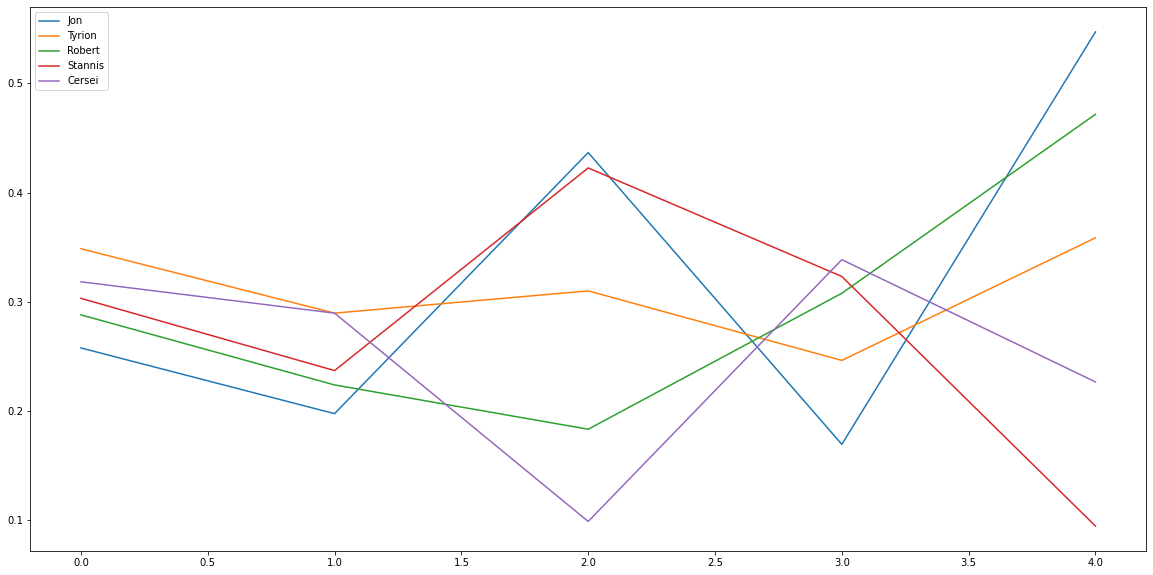

In [10]:
# Top 5 connected characters over time 
degree_evolD_df[degree_evolD_df.sum().sort_values(ascending=False)[:5].index.values].plot(figsize=(20, 10))

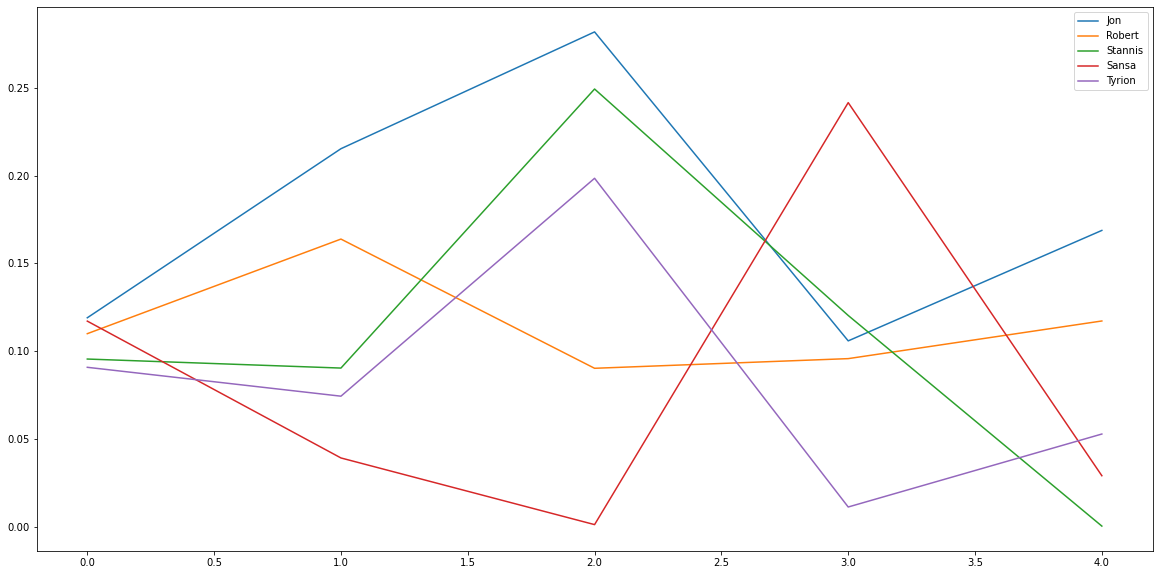

In [11]:
# Top 5 influential characters over time 
degree_evolB_df[degree_evolB_df.sum().sort_values(ascending=False)[:5].index.values].plot(figsize=(20, 10))

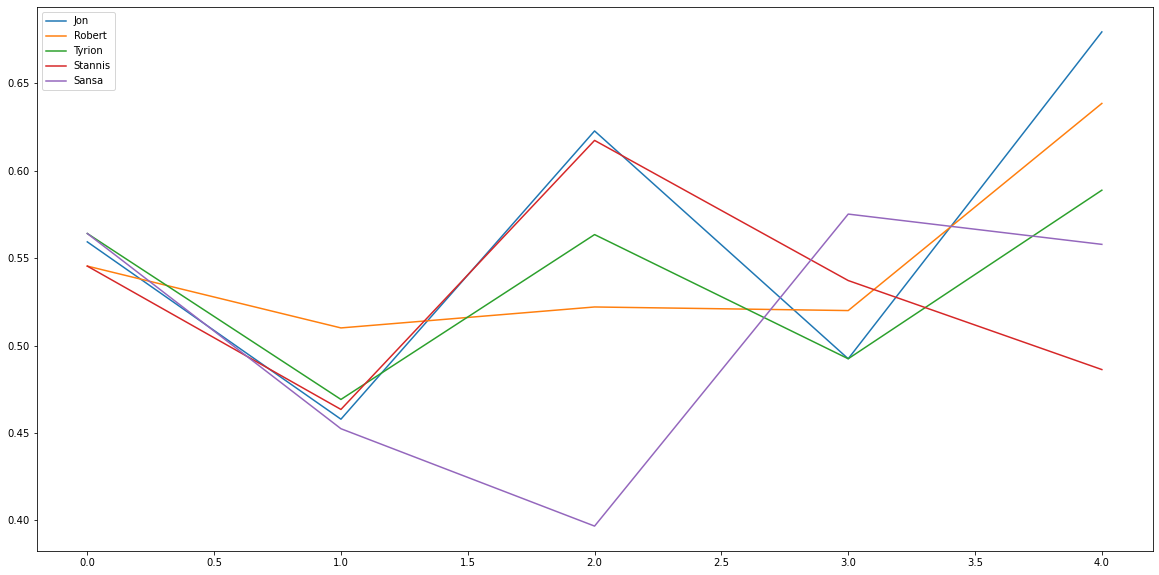

In [12]:
# Top 5 central characters over time 
degree_evolC_df[degree_evolC_df.sum().sort_values(ascending=False)[:5].index.values].plot(figsize=(20, 10))

#### Branndon Marion